# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [7]:
 !pip install seaborn==0.11.0
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams.

In [8]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Задания
#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


(array([  2.,   6.,  14.,  55., 126., 161., 223., 225., 120.,  68.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <BarContainer object of 10 artists>)

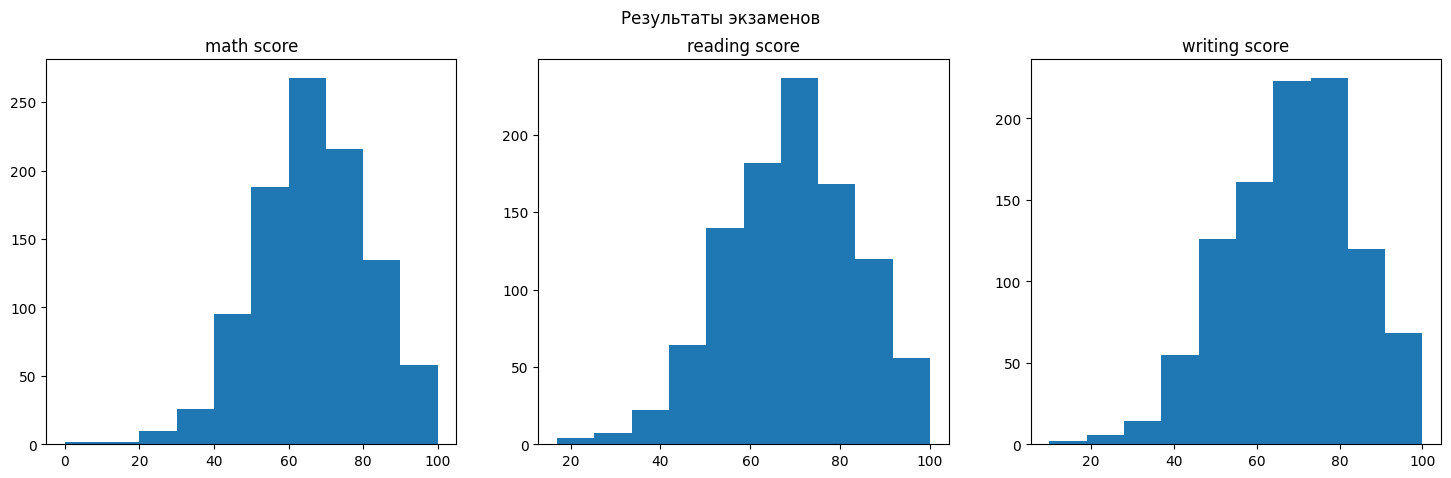

In [9]:
fig, axes = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(18)

fig.suptitle('Результаты экзаменов')
axes[0].set_title('math score')
axes[1].set_title('reading score')
axes[2].set_title('writing score')

axes[0].hist(df['math score'])
axes[1].hist(df['reading score'])
axes[2].hist(df['writing score'])

In [10]:
print(f'math score {df["math score"].median()}')
print(f'reading score {df["reading score"].median()}')
print(f'writing score {df["writing score"].median()}')


math score 66.0
reading score 70.0
writing score 69.0


#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню?

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.

Ответ Да отличаются. У родителей, которые имеют более высокое образование, дети имеют более высокие баллы

In [11]:
#уровни образования и количество
df['parental level of education'].value_counts()

,count
parental level of education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


<Axes: xlabel='parental level of education', ylabel='math score'>

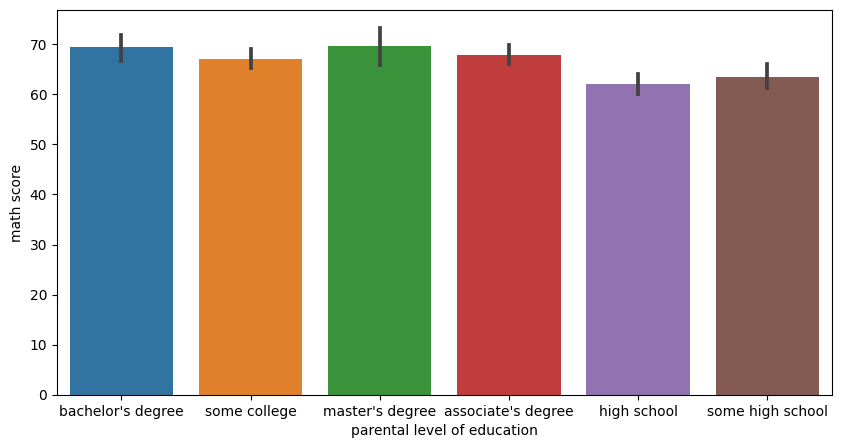

In [12]:
plt.figure(figsize=[10, 5])
df['parental level of education'].value_counts()
sns.barplot(data = df, x = 'parental level of education', y = 'math score')

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [13]:
len(df[(df['gender'] == 'female') & (df[['math score', 'reading score', 'writing score']].min(axis = 1) > 90)])

17

#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение


In [14]:
df[['gender', 'math score', 'reading score', 'writing score']].groupby('gender').agg(['min', 'max', 'median'])

math score             reading score             writing score       \
              min  max median           min  max median           min  max   
gender                                                                       
female          0  100   65.0            17  100   73.0            10  100   
male           27  100   69.0            23  100   66.0            15  100   

               
       median  
gender         
female   74.0  
male     64.0

#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола
###### (подсказка: используете agg())

Ответ: Влияет

In [25]:
df[['lunch','gender','math score','writing score','reading score', 'test preparation course']].groupby(['lunch','gender', 'test preparation course']).agg(['mean'])

math score writing score  \
                                                  mean          mean   
lunch        gender test preparation course                            
free/reduced female completed                60.785714     74.371429   
                    none                     52.890756     61.781513   
             male   completed                65.639344     65.737705   
                    none                     60.609524     55.285714   
standard     female completed                71.131579     81.508772   
                    none                     66.530233     72.967442   
             male   completed                75.955752     71.982301   
                    none                     69.832512     61.906404   

                                            reading score  
                                                     mean  
lunch        gender test preparation course                
free/reduced female completed                   73.428571  
                    none                        63.831933  
             male   completed                   65.786885  
                    none                        59.076190  
standard     female completed                   79.798246  
                    none                        73.386047  
             male   completed                   72.601770  
                    none                        64.719212

#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы

<Axes: xlabel='parental level of education', ylabel='count'>

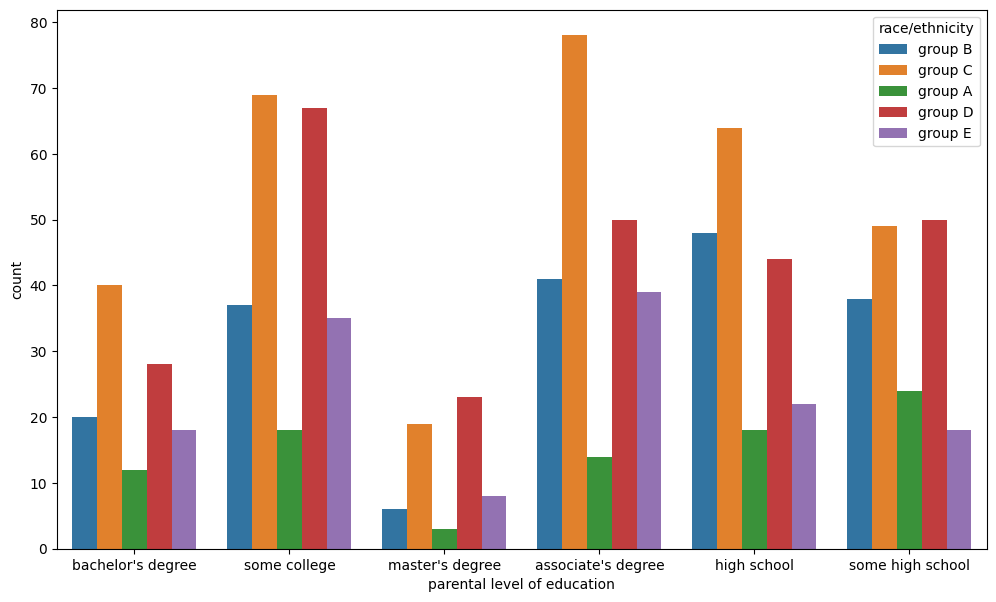

In [17]:
plt.figure(figsize=[12, 7])
sns.countplot(data = df, x='parental level of education', hue='race/ethnicity')

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

Ответ: дети бакалавров и магистров

<Axes: xlabel='parental level of education', ylabel='count'>

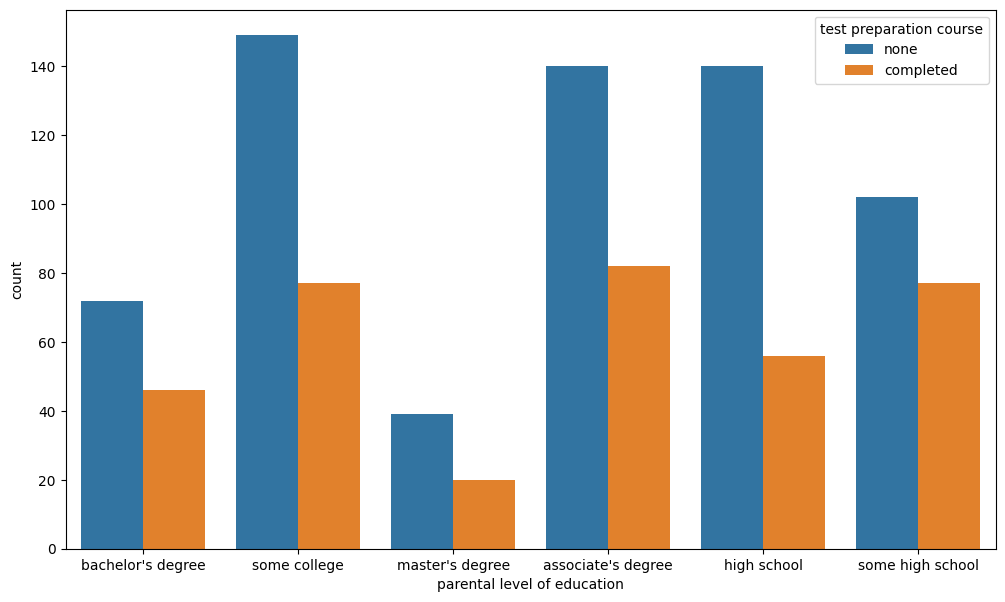

In [18]:
plt.figure(figsize=[12, 7])
sns.countplot(data = df, x='parental level of education', hue='test preparation course')

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

<Axes: ylabel='count'>

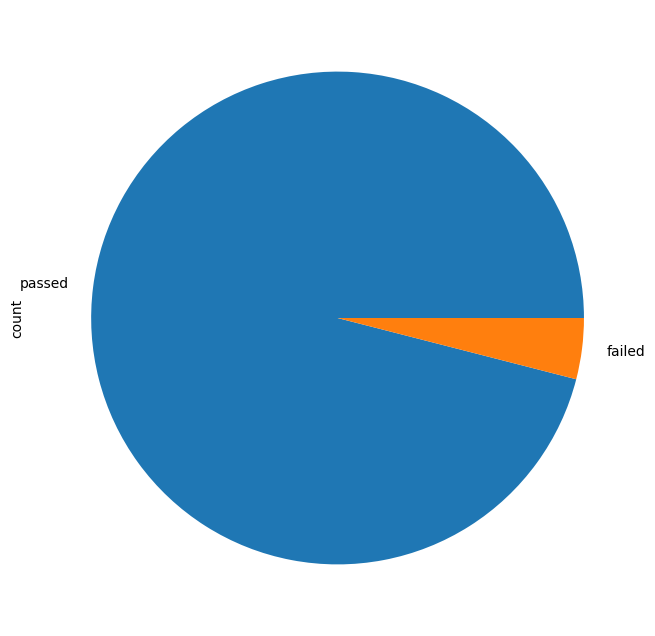

In [19]:
plt.figure(figsize=[8, 8])
df['mathRes'] =  df['math score'].apply(lambda x: 'passed' if x >= 40 else 'failed')
df['mathRes'].value_counts().plot.pie()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

<Axes: ylabel='count'>

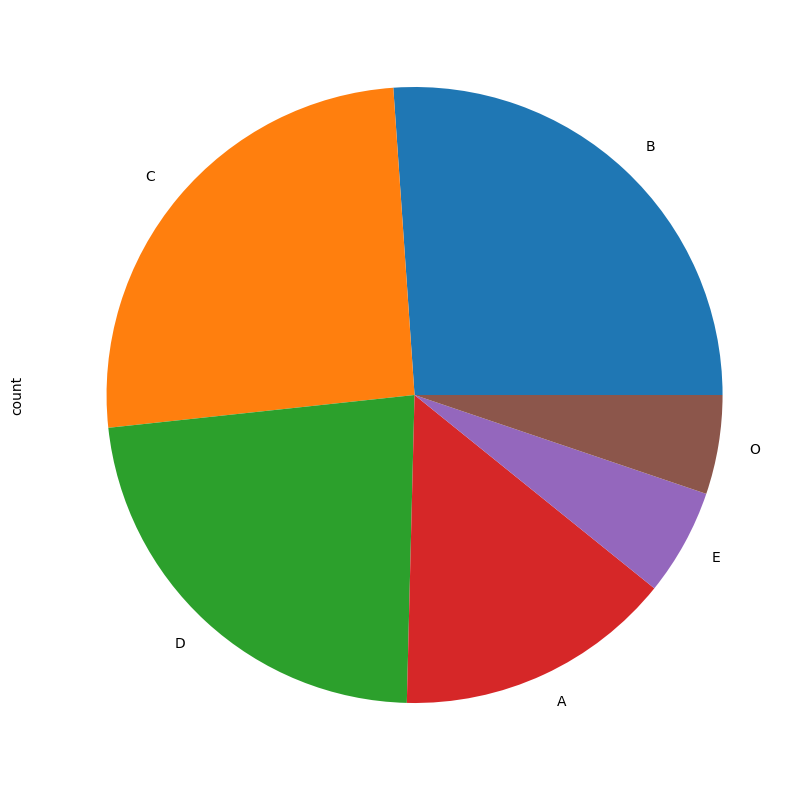

In [20]:
def val(x, y):
  if (y < 41):
    return 'E'
  if (x >= 90):
    return 'O'
  elif (x >= 80):
    return 'A'
  elif (x >= 70):
    return 'B'
  elif (x >= 60):
    return 'C'
  elif (x >= 41):
    return 'D'
  elif (x < 41):
    return 'E'

plt.figure(figsize=[10, 10])
df['mean'] = df[['math score', 'reading score', 'writing score']].mean(axis = 1)
df['val'] = df[['math score', 'mean']].apply(lambda x: val(x['mean'], x['math score']), axis = 1)
df['val'].value_counts().plot.pie()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В
Ответ: женского пола

<Axes: xlabel='gender', ylabel='count'>

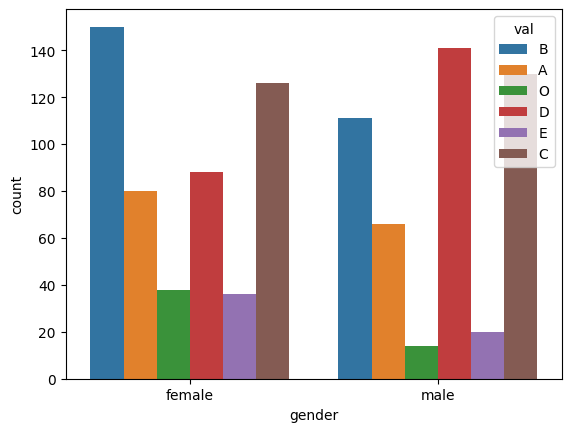

In [21]:
sns.countplot(data = df, x = 'gender', hue = 'val')